<a href="https://colab.research.google.com/github/explorer-Sanjita/MiniProjects_LP5_LP6/blob/main/BI_Miniproject_HotelManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No De

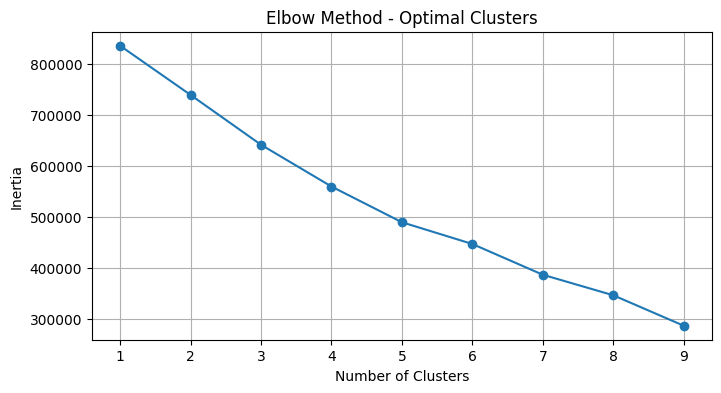

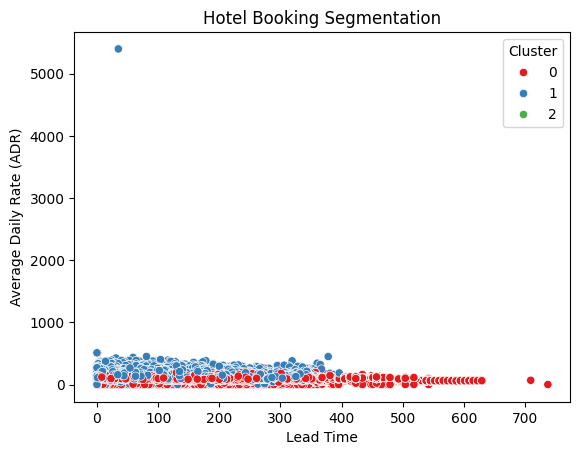


Cluster Counts:
 Cluster
0    77724
1    41521
2      145
Name: count, dtype: int64


In [5]:
# Step 1: Install required libraries (if not already present)
!pip install -q matplotlib seaborn scikit-learn

# Step 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 3: Load the dataset
url = 'https://raw.githubusercontent.com/mpolinowski/hotel-booking-dataset/refs/heads/master/datasets/hotel_bookings.csv'
data = pd.read_csv(url)

# Step 4: Basic data overview
print("First 5 rows:\n", data.head())
print("\nDataset shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())

# Step 5: Fill missing values
data.ffill(inplace=True)

# Step 6: Check column names for selecting features
print("\nAvailable columns:\n", data.columns.tolist())

# Step 7: Select relevant numeric features for clustering
features = ['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr']

# Add 'total_of_special_requests' if available
if 'total_of_special_requests' in data.columns:
    features.append('total_of_special_requests')

# Step 8: Scale selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Step 9: Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method - Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 10: Apply KMeans with 3 clusters (based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Step 11: Add cluster labels to original dataset
data['Cluster'] = clusters

# Step 12: Visualize clusters (using 2 main features for simplicity)
sns.scatterplot(x=data['lead_time'], y=data['adr'], hue=data['Cluster'], palette='Set1')
plt.title("Hotel Booking Segmentation")
plt.xlabel("Lead Time")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

# Step 13: Display cluster sizes
print("\nCluster Counts:\n", data['Cluster'].value_counts())
